In [1]:
import time
import os
import cv2
import matplotlib.pyplot as plt
from lib.utilities import *
import numpy as np
import pandas as pd

In [2]:
data_dir = "C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/"
csv_filename_1 = 'velocity_scnn1a_part1_3_7_slice1.csv'
csv_filename_2 = 'velocity_scnn1a_part1_3_7_slice2.csv'
plt.rcParams.update({'font.size': 16})
#plt.rcParams['figure.figsize'] = [20, 12]

In [3]:
df1 = pd.read_csv(data_dir + csv_filename_1)
df1 = pd.DataFrame(df1)

latency_labels = ['L2/3 Latency (ms)',  'L4 barrel 1 Latency',  'L4 barrel 2 Latency', 'L4 barrel 3 Latency', 'L5 Latency']
snr_labels = ['L2/3 SNR', 'L4 barrel 1 SNR',  'L4 barrel 2 SNR', 'L4 barrel 3 SNR', 'L5 SNR']
response_sites = ['L2/3', 'L4 barrel 1', 'L4 barrel 2', 'L4 barrel 3', 'L5']

for col in latency_labels:
    df1.loc[:, col] -= 48

  Slice/Loc/Rec  L2/3 Latency (ms) Stim Location  L5 Latency  \
0      01_01_07                NaN          L2/3         NaN   
1      01_02_05                NaN   L4 barrel 1         NaN   
2      01_03_03                NaN   L4 barrel 2         NaN   
3      01_03_04                NaN   L4 barrel 2         NaN   
4      01_04_02                NaN   L4 barrel 3         NaN   
5      01_05_05                NaN            L5      2.1805   

   L4 barrel 1 Latency  L4 barrel 2 Latency  L4 barrel 3 Latency  
0                  NaN                  NaN                  NaN  
1               1.6385               2.8297                  NaN  
2                  NaN               1.6515                  NaN  
3                  NaN               1.7160                  NaN  
4                  NaN               2.0347                1.866  
5                  NaN               2.7954                  NaN  


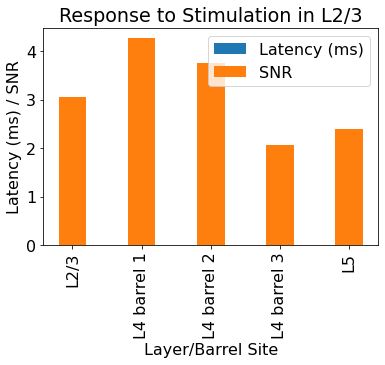

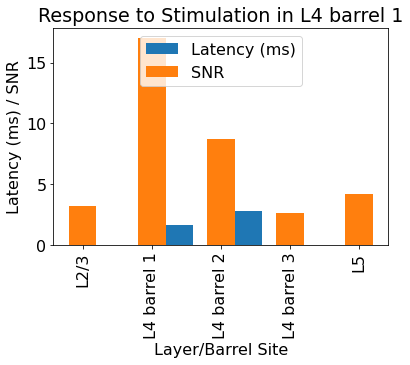

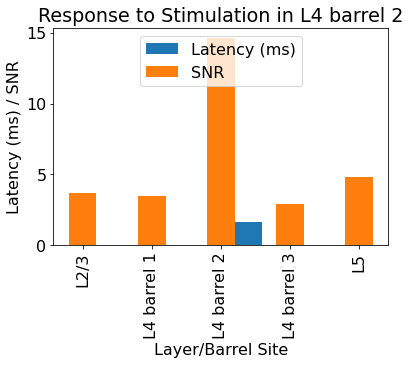

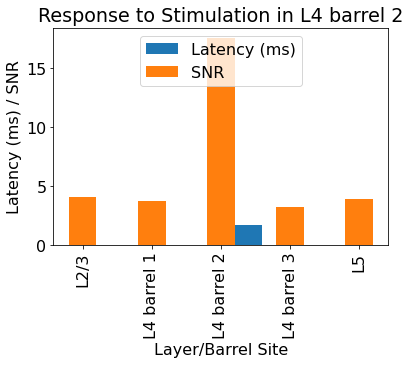

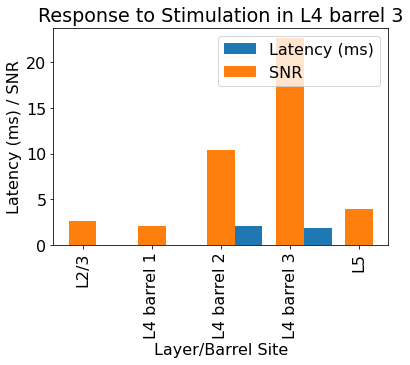

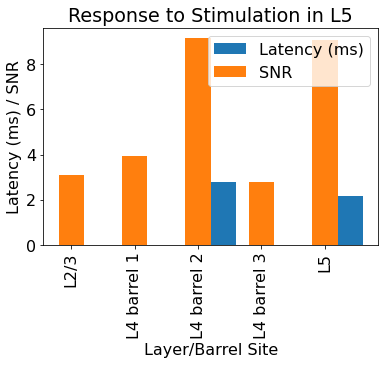

In [5]:
# 3/7 Slice 1: Latency for each response site

print(df1.loc[:, ['Slice/Loc/Rec', 'L2/3 Latency (ms)', 'Stim Location',
              'L5 Latency',  'L4 barrel 1 Latency',  
              'L4 barrel 2 Latency', 'L4 barrel 3 Latency']])
for i in range(6):
    stim_site = df1.loc[i, "Stim Location"]
    
    x = np.arange(len(response_sites))
    
    plt.clf()
    plt.bar(x + 0.2, 
            df1.loc[i, latency_labels],
            0.4,
            label='Latency (ms)',
            tick_label=response_sites)
    plt.bar(x - 0.2, 
            df1.loc[i, snr_labels],
            0.4,
            label='SNR',
            tick_label=response_sites)
    plt.title("Response to Stimulation in " + stim_site)
    plt.xlabel("Layer/Barrel Site")
    plt.ylabel("Latency (ms) / SNR")
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.savefig(data_dir + "3-7_01_" + stim_site.replace("/", "") + ".png")
    plt.show()

In [5]:
df2 = pd.read_csv(data_dir + csv_filename_2)
df2 = pd.DataFrame(df2)
latency_labels = ['L2/3 barrel 1 Latency (ms)',
                  'L2/3 barrel 2 Latency (ms)',
                  'L2/3 barrel 3 Latency (ms)',
                  'L4 barrel 1 Latency',  'L4 barrel 2 Latency', 'L4 barrel 3 Latency', 'L5 Latency']
snr_labels = ['L2/3 barrel 1 SNR',
              'L2/3 barrel 2 SNR',
              'L2/3 barrel 3 SNR',
              'L4 barrel 1 SNR',  'L4 barrel 2 SNR', 'L4 barrel 3 SNR', 'L5 SNR']
response_sites = ['L2/3 barrel 1', 
                  'L2/3 barrel 2',
                  'L2/3 barrel 3', 'L4 barrel 1', 'L4 barrel 2', 'L4 barrel 3', 'L5']

for col in latency_labels:
    df2.loc[:, col] -= 48

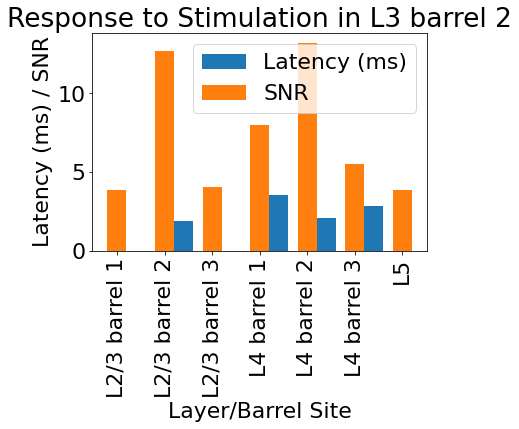

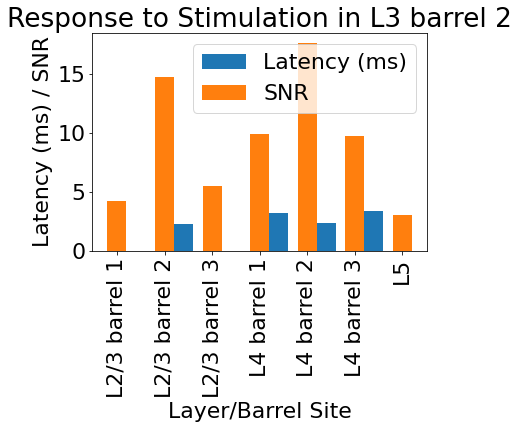

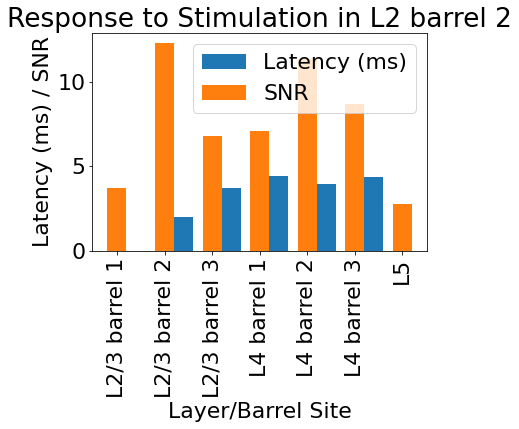

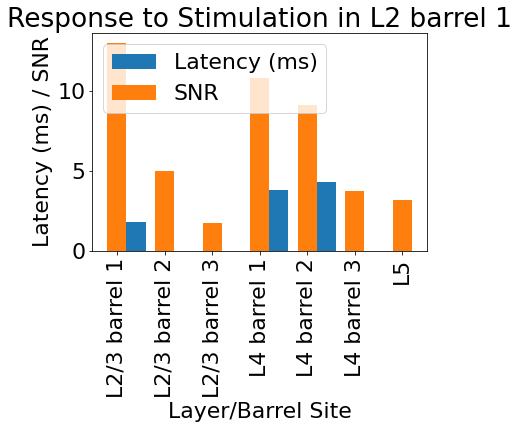

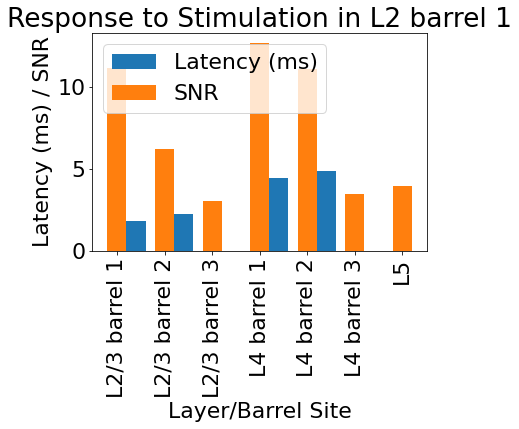

In [6]:
# 3/7 Slice 1: Latency for each response site
for i in range(5):
    stim_site = df2.loc[i, "Stim Location"]
    
    x = np.arange(len(response_sites))
    
    plt.clf()
    plt.bar(x + 0.2, 
            df2.loc[i, latency_labels],
            0.4,
            label='Latency (ms)',
            tick_label=response_sites)
    plt.bar(x - 0.2, 
            df2.loc[i, snr_labels],
            0.4,
            label='SNR',
            tick_label=response_sites)
    plt.title("Response to Stimulation in " + stim_site)
    plt.xlabel("Layer/Barrel Site")
    plt.ylabel("Latency (ms) / SNR")
    plt.xticks(rotation='vertical')

    plt.legend()
    plt.savefig(data_dir + "3-7_02_" + stim_site + ".png")
    plt.show()

     Index    Barrel2    Barrel3    Barrel1
0        0 -16.717200 -13.305600 -17.308100
1        1 -15.787400 -13.141200 -16.168200
2        2 -14.659400 -12.542100 -14.759600
3        3 -13.271700 -11.470000 -13.086400
4        4 -11.881200 -10.189500 -11.500600
..     ...        ...        ...        ...
195    195  -0.603303  -0.084445  -0.668206
196    196  -0.753709  -0.149413  -0.677723
197    197  -0.692895  -0.222337  -0.714717
198    198  -0.230698  -0.155268  -0.391225
199    199   0.443075   0.008784   0.263389

[200 rows x 4 columns]


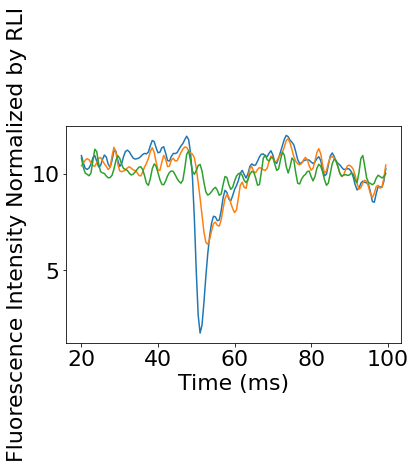

In [7]:
# 3/7 slice 1 L4 traces: barrel 1
traces_barrel_1 = data_dir + "03-07-23/selected_zda/analysis01_02_05/traces_L4_barrels.dat"
traces_barrel_1 = pd.read_csv(traces_barrel_1,
                         sep='\t',
                         header=0,
                         names=['Index',  'Barrel2',  'Barrel3',  'Barrel1'])
print(traces_barrel_1)
plt.clf()
start_cut = 40
baseline = 10
v1 = traces_barrel_1.loc[start_cut:, ["Barrel1"]] + baseline
v2 = traces_barrel_1.loc[start_cut:, ["Barrel2"]] + baseline
v3 = traces_barrel_1.loc[start_cut:, ["Barrel3"]] + baseline
t = [(i+start_cut) * 0.5 for i in range(len(v1))]
plt.plot(t, v1, label="L4 barrel 1 response")
plt.plot(t, v2, label="L4 barrel 2 response")
plt.plot(t, v3, label="L4 barrel 3 response")
# plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Fluorescence Intensity Normalized by RLI")
#plt.title("Responses to Stimulation in L4 Barrel 1")
plt.savefig(data_dir + "03-07-23/selected_zda/analysis01_02_05/traces_barrel_1.png")
plt.show()

     Index   Barrel2    Barrel3    Barrel1
0        0 -20.21260 -16.809900 -15.449600
1        1 -20.09690 -16.062700 -15.147600
2        2 -19.59450 -14.907100 -14.384400
3        3 -18.71010 -13.484500 -13.199000
4        4 -17.63960 -12.164200 -11.929300
..     ...       ...        ...        ...
195    195  -1.20616  -0.740816  -0.765912
196    196  -1.91374  -0.464086  -0.718752
197    197  -2.53861  -0.591607  -0.908295
198    198  -2.99196  -1.346360  -1.612730
199    199  -3.31189  -2.607560  -2.716520

[200 rows x 4 columns]


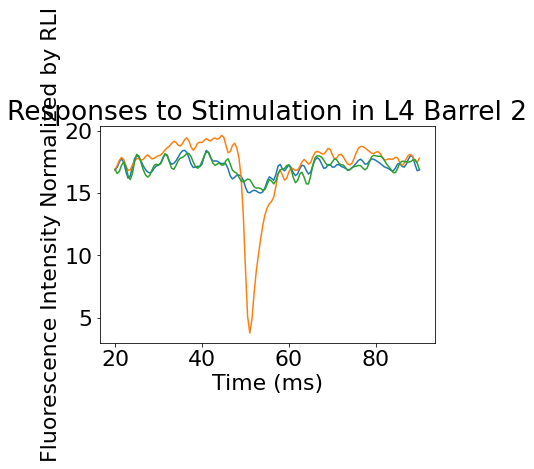

In [8]:
# 3/7 slice 1 L4 traces: barrel 2
traces_barrel_1 = data_dir + "03-07-23/selected_zda/analysis01_03_03/traces_L4_barrels.dat"
traces_barrel_1 = pd.read_csv(traces_barrel_1,
                         sep='\t',
                         header=0,
                         names=['Index',  'Barrel2',  'Barrel3',  'Barrel1'])
print(traces_barrel_1)
plt.clf()
start_cut = 40
end_cut = 180
baseline = 17
v1 = traces_barrel_1.loc[start_cut:end_cut, ["Barrel1"]] + baseline
v2 = traces_barrel_1.loc[start_cut:end_cut, ["Barrel2"]] + baseline
v3 = traces_barrel_1.loc[start_cut:end_cut, ["Barrel3"]] + baseline
t = [(i+start_cut) * 0.5 for i in range(len(v1))]
plt.plot(t, v1, label="L4 barrel 1 response")
plt.plot(t, v2, label="L4 barrel 2 response")
plt.plot(t, v3, label="L4 barrel 3 response")
#plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Fluorescence Intensity Normalized by RLI")
plt.title("Responses to Stimulation in L4 Barrel 2")
plt.savefig(data_dir + "03-07-23/selected_zda/analysis01_03_03/traces_barrel_2.png")
plt.show()


     Index    Barrel2    Barrel3    Barrel1
0        0 -17.867300 -16.801700 -13.875500
1        1 -16.890400 -15.834500 -13.021900
2        2 -15.731000 -14.764800 -12.064400
3        3 -14.387100 -13.666200 -10.997400
4        4 -12.887000 -12.675900  -9.838350
..     ...        ...        ...        ...
195    195  -0.605406  -0.906971  -0.044002
196    196  -0.722494  -1.383320  -0.195205
197    197  -1.004310  -2.028210  -0.409423
198    198  -1.440300  -2.417920  -0.530171
199    199  -1.930060  -2.446470  -0.510169

[200 rows x 4 columns]


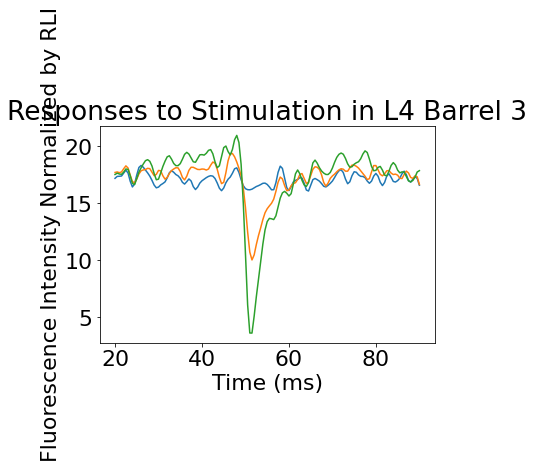

In [9]:
# 3/7 slice 1 L4 traces: barrel 3
traces_barrel_1 = data_dir + "03-07-23/selected_zda/analysis01_04_02/traces_L4_barrels.dat"
traces_barrel_1 = pd.read_csv(traces_barrel_1,
                         sep='\t',
                         header=0,
                         names=['Index',  'Barrel2',  'Barrel3',  'Barrel1'])
print(traces_barrel_1)
plt.clf()
start_cut = 40
end_cut = 180
baseline = 17
v1 = traces_barrel_1.loc[start_cut:end_cut, ["Barrel1"]] + baseline
v2 = traces_barrel_1.loc[start_cut:end_cut, ["Barrel2"]] + baseline
v3 = traces_barrel_1.loc[start_cut:end_cut, ["Barrel3"]] + baseline
t = [(i+start_cut) * 0.5 for i in range(len(v1))]
plt.plot(t, v1, label="L4 barrel 1 response")
plt.plot(t, v2, label="L4 barrel 2 response")
plt.plot(t, v3, label="L4 barrel 3 response")
# plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Fluorescence Intensity Normalized by RLI")
plt.title("Responses to Stimulation in L4 Barrel 3")
plt.savefig(data_dir + "03-07-23/selected_zda/analysis01_04_02/traces_barrel_3.png")
plt.show()


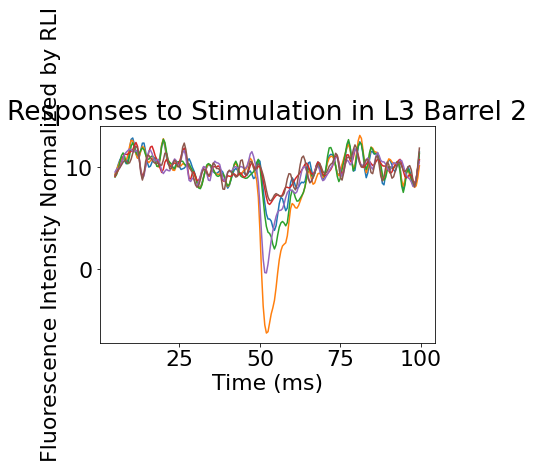

     Index  L4 Barrel1  L4 Barrel2  L4 Barrel3  L2/3 Barrel1  L2/3 Barrel2  \
0        0   -6.085270    -8.12298   -6.370150     -3.619980     -4.316420   
1        1   -5.230390    -7.43280   -6.347510     -3.683630     -4.342830   
2        2   -4.656000    -6.72968   -6.265270     -3.691730     -4.121900   
3        3   -4.447930    -6.09654   -5.990430     -3.746330     -3.803840   
4        4   -4.456410    -5.54090   -5.456600     -3.709890     -3.384300   
..     ...         ...         ...         ...           ...           ...   
195    195   -0.950293    -1.45804   -0.948314     -0.682809     -0.880253   
196    196   -1.450130    -1.87239   -1.760980     -0.525854     -0.329715   
197    197   -1.131350    -1.65344   -1.949080     -0.582488      0.042521   
198    198   -0.575523    -1.36292   -1.914620     -1.201120     -0.425193   
199    199   -0.668006    -1.73947   -2.352950     -2.368280     -1.690300   

     L2/3 Barrel3  
0       -3.355250  
1       -3.301360  
2  

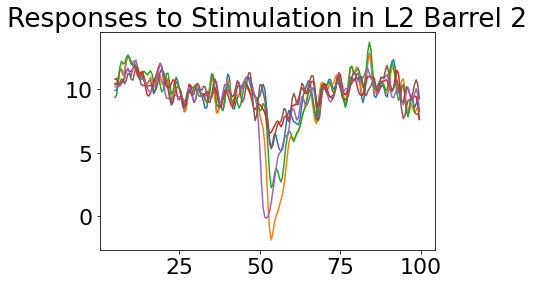

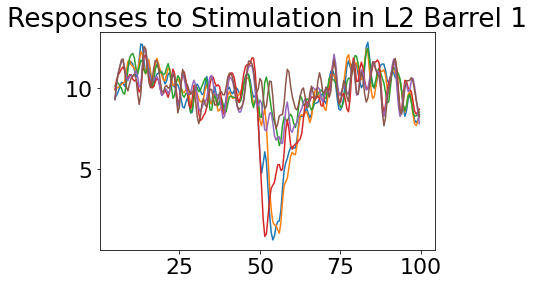

In [10]:
# 3/7 slice 2-1 traces: stim in L3 middle barrel
traces_barrel_1 = data_dir + "03-07-23/selected_zda/analysis02_01_04/traces_barrels.dat"
traces_barrel_1 = pd.read_csv(traces_barrel_1,
                         sep='\t',
                         header=0,
                         names=['Index',  'L4 Barrel1',  'L4 Barrel2',  'L4 Barrel3',
                               'L2/3 Barrel1',  'L2/3 Barrel2',  'L2/3 Barrel3'])
plt.clf()
start_cut = 10
baseline = 10
v1 = traces_barrel_1.loc[start_cut:, ["L4 Barrel1"]] + baseline
v2 = traces_barrel_1.loc[start_cut:, ["L4 Barrel2"]] + baseline
v3 = traces_barrel_1.loc[start_cut:, ["L4 Barrel3"]] + baseline
vv1 = traces_barrel_1.loc[start_cut:, ["L2/3 Barrel1"]] + baseline
vv2 = traces_barrel_1.loc[start_cut:, ["L2/3 Barrel2"]] + baseline
vv3 = traces_barrel_1.loc[start_cut:, ["L2/3 Barrel3"]] + baseline
t = [(i+start_cut) * 0.5 for i in range(len(v1))]
plt.plot(t, v1, label="L4 barrel 1 response")
plt.plot(t, v2, label="L4 barrel 2 response")
plt.plot(t, v3, label="L4 barrel 3 response")
plt.plot(t, vv1, label="L2/3 barrel 1 response")
plt.plot(t, vv2, label="L2/3 barrel 2 response")
plt.plot(t, vv3, label="L2/3 barrel 3 response")
#plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Fluorescence Intensity Normalized by RLI")
plt.title("Responses to Stimulation in L3 Barrel 2")
plt.savefig(data_dir + "03-07-23/selected_zda/analysis02_01_04/traces_barrel.png")
plt.show()

# 3/7 slice 2-1 traces: stim in L2 middle barrel
traces_barrel_1 = data_dir + "03-07-23/selected_zda/analysis02_02_02/traces_barrels.dat"
traces_barrel_1 = pd.read_csv(traces_barrel_1,
                         sep='\t',
                         header=0,
                         names=['Index',  'L4 Barrel1',  'L4 Barrel2',  'L4 Barrel3',
                               'L2/3 Barrel1',  'L2/3 Barrel2',  'L2/3 Barrel3'])
print(traces_barrel_1)
plt.clf()
start_cut = 10
baseline = 10
v1 = traces_barrel_1.loc[start_cut:, ["L4 Barrel1"]] + baseline
v2 = traces_barrel_1.loc[start_cut:, ["L4 Barrel2"]] + baseline
v3 = traces_barrel_1.loc[start_cut:, ["L4 Barrel3"]] + baseline
vv1 = traces_barrel_1.loc[start_cut:, ["L2/3 Barrel1"]] + baseline
vv2 = traces_barrel_1.loc[start_cut:, ["L2/3 Barrel2"]] + baseline
vv3 = traces_barrel_1.loc[start_cut:, ["L2/3 Barrel3"]] + baseline
t = [(i+start_cut) * 0.5 for i in range(len(v1))]
plt.plot(t, v1, label="L4 barrel 1 response")
plt.plot(t, v2, label="L4 barrel 2 response")
plt.plot(t, v3, label="L4 barrel 3 response")
plt.plot(t, vv1, label="L2/3 barrel 1 response")
plt.plot(t, vv2, label="L2/3 barrel 2 response")
plt.plot(t, vv3, label="L2/3 barrel 3 response")
plt.title("Responses to Stimulation in L2 Barrel 2")
plt.savefig(data_dir + "03-07-23/selected_zda/analysis02_02_02/traces_barrel.png")
plt.show()

# 3/7 slice 2-1 traces: stim in L2 side barrel
traces_barrel_1 = data_dir + "03-07-23/selected_zda/analysis02_03_08/traces_barrels.dat"
traces_barrel_1 = pd.read_csv(traces_barrel_1,
                         sep='\t',
                         header=0,
                         names=['Index',  'L4 Barrel1',  'L4 Barrel2',  'L4 Barrel3',
                               'L2/3 Barrel1',  'L2/3 Barrel2',  'L2/3 Barrel3'])
plt.clf()
start_cut = 10
baseline = 10
v1 = traces_barrel_1.loc[start_cut:, ["L4 Barrel1"]] + baseline
v2 = traces_barrel_1.loc[start_cut:, ["L4 Barrel2"]] + baseline
v3 = traces_barrel_1.loc[start_cut:, ["L4 Barrel3"]] + baseline
vv1 = traces_barrel_1.loc[start_cut:, ["L2/3 Barrel1"]] + baseline
vv2 = traces_barrel_1.loc[start_cut:, ["L2/3 Barrel2"]] + baseline
vv3 = traces_barrel_1.loc[start_cut:, ["L2/3 Barrel3"]] + baseline
t = [(i+start_cut) * 0.5 for i in range(len(v1))]
plt.plot(t, v1, label="L4 barrel 1 response")
plt.plot(t, v2, label="L4 barrel 2 response")
plt.plot(t, v3, label="L4 barrel 3 response")
plt.plot(t, vv1, label="L2/3 barrel 1 response")
plt.plot(t, vv2, label="L2/3 barrel 2 response")
plt.plot(t, vv3, label="L2/3 barrel 3 response")
plt.title("Responses to Stimulation in L2 Barrel 1")
plt.savefig(data_dir + "03-07-23/selected_zda/analysis02_03_08/traces_barrel.png")
plt.show()
